## Details

Candidate Name - Ravi Nirala

Date of submission - 14 May 2021

## Text analysis

Key output deliverables
1. Text similarity - generate a matrix S(i, j) which gives the extent of similarity between i-th and j-th comment. 
2. Topic modeling - extract key topics of discussion from the topics, top 5 distinct topics, and which articles related to which article. 
3. Classification - is the annotation in this data consistent for building a model?
4. Text summarization - How would you summarize the information being looked at this data?  

## Introduction

This is a collection of articles in aviation space, from different sources collected for a market analysis in 2018 from open sources including news websites. Please use this information without any additional data sources. Use the notebook to respond back to team.   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

dataset = pd.read_csv('text_2021.csv')

In [3]:
dataset.columns

Index(['Content', 'Source', 'label'], dtype='object')

In [4]:
dataset.head()

,Content,Source,label
0,When a group of us decided to submit to the Ai...,Telegraph,0
1,Qatar Airways chief executive officer Akbar Al...,Telegraph,0
2,Low-cost airline Ryanair has been blown off co...,Telegraph,0
3,"Sir Tim Clark, the Briton who runs Emirates, h...",Telegraph,0
4,We've noticed you're adblocking.\r\n\r\nWe rel...,Telegraph,0


In [5]:
dataset.shape

(871, 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

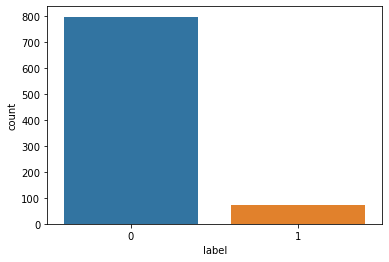

In [6]:
sns.countplot(dataset["label"])

Dataset is very imbalanced.

## pre processing

In [7]:
# clearing and modifying the text
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize

In [8]:
# nltk.download('wordnet')
# nltk.download('punkt')

In [9]:
lemmatizer = WordNetLemmatizer()  # object for lemmatization

In [10]:
corpus = []
for i in range(0, len(dataset)):
    
    review = dataset.values[i,0].lower() # making lower case
    
    review = re.sub('[^a-zA-Z]', ' ', review) #removing any characters apart from alphabets
    
    review = word_tokenize(review)  # tokenization
    
    review = [ word for word in review if len(word) > 1]  # removing single digit words
    
    # removing stopwords
    review = [ word for word in review if not word in stopwords.words('english') ]
    
    # lemmatization
    review = [ lemmatizer.lemmatize(word) for word in review ]  
    
    review = ' '.join(review)
    
    corpus.append(review)

In [11]:
corpus

['group u decided submit airport commission independent idea expand heathrow differing heathrow airport proposal would involve extending existing northern runway rather building new third one little know would tougher anything experienced concorde pilot director british airway operation heathrow gatwick government went heathrow third runway proposal parliament expected start approval process week despite fact plan delivers capacity economic benefit cheaper simpler quieter quicker build destroys',
 'qatar airway chief executive officer akbar al baker say man could rise challenge job moment becoming chairman international air transport association board governor one world biggest boy club mr al baker little suggest thing change press conference sydney iata held annual meeting asked could done woeful representation woman middle east aviation case qatar airway mr al baker told reporter course led man challenging position loud groan disapproval many reporter room comment',
 'low cost airlin

In [12]:
dataset['clean_text'] = corpus

## feature extraction

In [13]:
# Extracting Features from Cleaned Tweets using tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df = 0.90, min_df = 2)
vec_mat = vectorizer.fit_transform(dataset['clean_text'])

In [14]:
# feature_names = vectorizer.get_feature_names()

# Part 1. Text Similarity

In [15]:
# text similarity based on cosine similarity of vectors
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
csim = cosine_similarity(vec_mat, vec_mat)

In [17]:
csim

array([[1.        , 0.0263406 , 0.02735132, ..., 0.        , 0.01617013,
        0.01437617],
       [0.0263406 , 1.        , 0.01750431, ..., 0.01893037, 0.0063013 ,
        0.01609933],
       [0.02735132, 0.01750431, 1.        , ..., 0.04608937, 0.01046289,
        0.01951115],
       ...,
       [0.        , 0.01893037, 0.04608937, ..., 1.        , 0.00415849,
        0.03958961],
       [0.01617013, 0.0063013 , 0.01046289, ..., 0.00415849, 1.        ,
        0.04537176],
       [0.01437617, 0.01609933, 0.01951115, ..., 0.03958961, 0.04537176,
        1.        ]])

In [18]:
# indexes of similar documents
similar_idx = []
for i in range(871):
    for j in range(i):
        if csim[i,j] > 0.7:
            similar_idx.append((i,j))   

In [19]:
# pair of indexes of articles which are similar
similar_idx

[(51, 26),
 (52, 51),
 (55, 51),
 (55, 52),
 (58, 51),
 (58, 52),
 (58, 55),
 (80, 51),
 (80, 52),
 (80, 55),
 (80, 58),
 (90, 51),
 (97, 51),
 (97, 52),
 (97, 55),
 (97, 58),
 (97, 80),
 (99, 51),
 (104, 51),
 (104, 52),
 (104, 58),
 (112, 51),
 (113, 51),
 (113, 52),
 (113, 55),
 (113, 58),
 (113, 80),
 (113, 97),
 (123, 51),
 (124, 51),
 (124, 52),
 (129, 83),
 (161, 51),
 (161, 52),
 (161, 55),
 (161, 58),
 (161, 80),
 (161, 97),
 (161, 104),
 (161, 113),
 (179, 51),
 (179, 52),
 (179, 58),
 (179, 80),
 (179, 161),
 (188, 185),
 (189, 187),
 (196, 182),
 (205, 51),
 (205, 52),
 (205, 55),
 (205, 58),
 (205, 80),
 (205, 97),
 (205, 104),
 (205, 113),
 (205, 124),
 (205, 161),
 (205, 179),
 (206, 66),
 (208, 51),
 (208, 52),
 (208, 58),
 (208, 80),
 (208, 97),
 (208, 113),
 (208, 161),
 (208, 205),
 (239, 51),
 (239, 52),
 (239, 55),
 (239, 58),
 (239, 80),
 (239, 97),
 (239, 113),
 (239, 161),
 (239, 179),
 (239, 205),
 (239, 208),
 (256, 51),
 (259, 51),
 (259, 52),
 (259, 58),
 (2

In [20]:
csim[26,161]

0.6831874721106762

# Part 4 - Text Summarization

In [21]:
dataset.head()

,Content,Source,label,clean_text
0,When a group of us decided to submit to the Ai...,Telegraph,0,group u decided submit airport commission inde...
1,Qatar Airways chief executive officer Akbar Al...,Telegraph,0,qatar airway chief executive officer akbar al ...
2,Low-cost airline Ryanair has been blown off co...,Telegraph,0,low cost airline ryanair blown course slew air...
3,"Sir Tim Clark, the Briton who runs Emirates, h...",Telegraph,0,sir tim clark briton run emirate laid vision f...
4,We've noticed you're adblocking.\r\n\r\nWe rel...,Telegraph,0,noticed adblocking rely advertising help fund ...


In [22]:
all_words = []
for sent in corpus:
    for word in word_tokenize(sent):
        all_words.append(word)

In [23]:
all_words

['group',
 'u',
 'decided',
 'submit',
 'airport',
 'commission',
 'independent',
 'idea',
 'expand',
 'heathrow',
 'differing',
 'heathrow',
 'airport',
 'proposal',
 'would',
 'involve',
 'extending',
 'existing',
 'northern',
 'runway',
 'rather',
 'building',
 'new',
 'third',
 'one',
 'little',
 'know',
 'would',
 'tougher',
 'anything',
 'experienced',
 'concorde',
 'pilot',
 'director',
 'british',
 'airway',
 'operation',
 'heathrow',
 'gatwick',
 'government',
 'went',
 'heathrow',
 'third',
 'runway',
 'proposal',
 'parliament',
 'expected',
 'start',
 'approval',
 'process',
 'week',
 'despite',
 'fact',
 'plan',
 'delivers',
 'capacity',
 'economic',
 'benefit',
 'cheaper',
 'simpler',
 'quieter',
 'quicker',
 'build',
 'destroys',
 'qatar',
 'airway',
 'chief',
 'executive',
 'officer',
 'akbar',
 'al',
 'baker',
 'say',
 'man',
 'could',
 'rise',
 'challenge',
 'job',
 'moment',
 'becoming',
 'chairman',
 'international',
 'air',
 'transport',
 'association',
 'board',
 '

In [24]:
# creating frequency distribution for each words
word_freq = {}
for word in all_words:
    if word not in word_freq.keys():
        word_freq[word] = 1
    else:
        word_freq[word] = word_freq[word] + 1

In [25]:
word_freq

{'group': 182,
 'u': 314,
 'decided': 18,
 'submit': 7,
 'airport': 212,
 'commission': 38,
 'independent': 29,
 'idea': 17,
 'expand': 38,
 'heathrow': 49,
 'differing': 3,
 'proposal': 49,
 'would': 581,
 'involve': 23,
 'extending': 8,
 'existing': 79,
 'northern': 36,
 'runway': 39,
 'rather': 57,
 'building': 50,
 'new': 842,
 'third': 171,
 'one': 391,
 'little': 41,
 'know': 38,
 'tougher': 6,
 'anything': 9,
 'experienced': 14,
 'concorde': 4,
 'pilot': 249,
 'director': 72,
 'british': 139,
 'airway': 131,
 'operation': 213,
 'gatwick': 20,
 'government': 242,
 'went': 26,
 'parliament': 30,
 'expected': 116,
 'start': 96,
 'approval': 107,
 'process': 112,
 'week': 182,
 'despite': 74,
 'fact': 34,
 'plan': 282,
 'delivers': 8,
 'capacity': 90,
 'economic': 64,
 'benefit': 54,
 'cheaper': 6,
 'simpler': 1,
 'quieter': 3,
 'quicker': 1,
 'build': 75,
 'destroys': 1,
 'qatar': 33,
 'chief': 332,
 'executive': 303,
 'officer': 83,
 'akbar': 7,
 'al': 34,
 'baker': 31,
 'say': 13

In [26]:
# words with maximum frequency
max_f = max(word_freq.values())

In [27]:
# normalized word frequency
for word in word_freq.keys():
    word_freq[word] = word_freq[word] / max_f

In [28]:
word_freq

{'group': 0.10532407407407407,
 'u': 0.18171296296296297,
 'decided': 0.010416666666666666,
 'submit': 0.004050925925925926,
 'airport': 0.12268518518518519,
 'commission': 0.02199074074074074,
 'independent': 0.01678240740740741,
 'idea': 0.009837962962962963,
 'expand': 0.02199074074074074,
 'heathrow': 0.028356481481481483,
 'differing': 0.001736111111111111,
 'proposal': 0.028356481481481483,
 'would': 0.33622685185185186,
 'involve': 0.013310185185185185,
 'extending': 0.004629629629629629,
 'existing': 0.045717592592592594,
 'northern': 0.020833333333333332,
 'runway': 0.022569444444444444,
 'rather': 0.03298611111111111,
 'building': 0.028935185185185185,
 'new': 0.48726851851851855,
 'third': 0.09895833333333333,
 'one': 0.22627314814814814,
 'little': 0.023726851851851853,
 'know': 0.02199074074074074,
 'tougher': 0.003472222222222222,
 'anything': 0.005208333333333333,
 'experienced': 0.008101851851851851,
 'concorde': 0.0023148148148148147,
 'pilot': 0.1440972222222222,
 'di

In [29]:
# function to create sentence scores and return summary
def summarize(text):
    sentences = sent_tokenize(text)
    sent_scores = {}
    for sent in sentences:
        score = 0   # initialized as 0
        for word in word_tokenize(sent.lower()):
            word = lemmatizer.lemmatize(word)
            if word in word_freq.keys():
                score = score + word_freq[word]
        sent_scores[sent] = score
        
    num_of_summary_sent = int((len(sent_scores)/3)+0.8)  # taking one-third of most important sences from each article
        
    summary_sentences = sorted(sent_scores, key=sent_scores.get, reverse=True)[:num_of_summary_sent] # sorting sentences by their scores
        
    summary = ' '.join(summary_sentences)  # join summarized sentences
        
    return summary
        

In [30]:
# creating a column as summary of article
article_summary = []
for article in dataset['Content']:
    article_summary.append(summarize(article))
dataset['summary'] = article_summary

In [31]:
dataset.head()

,Content,Source,label,clean_text,summary
0,When a group of us decided to submit to the Ai...,Telegraph,0,group u decided submit airport commission inde...,When a group of us decided to submit to the Ai...
1,Qatar Airways chief executive officer Akbar Al...,Telegraph,0,qatar airway chief executive officer akbar al ...,Qatar Airways chief executive officer Akbar Al...
2,Low-cost airline Ryanair has been blown off co...,Telegraph,0,low cost airline ryanair blown course slew air...,"The Irish-based carrier said more than 200,000..."
3,"Sir Tim Clark, the Briton who runs Emirates, h...",Telegraph,0,sir tim clark briton run emirate laid vision f...,The Dubai-based airline has already installed ...
4,We've noticed you're adblocking.\r\n\r\nWe rel...,Telegraph,0,noticed adblocking rely advertising help fund ...,We urge you to turn off your ad blocker for Th...


In [32]:
# example
summarize(dataset['Content'][2])

'The Irish-based carrier said more than 200,000 of its 12.5m customers were affected last month after 1,100 flights were cancelled. The airline pleaded with the European Commission to take “immediate action to prevent more air traffic control strikes” and deal with staff shortages to avoid large scale disruption ahead of the busy...'

# Part 2 - Topic Modelling

In [33]:
# Extracting Features from Cleaned Tweets using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_2 = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
vec_mat_2 = vectorizer_2.fit_transform(corpus)

In [34]:
vec_mat_2

<871x6748 sparse matrix of type '<class 'numpy.int64'>'
	with 88422 stored elements in Compressed Sparse Row format>

In [35]:
# list of word used to make document term matrix
word_list = vectorizer_2.get_feature_names()

In [36]:
# using LDA model
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components = 5)
LDA.fit(vec_mat_2)

LatentDirichletAllocation(n_components=5)

In [37]:
LDA.components_.shape

(5, 6748)

In [38]:
# siginifance probabilities of each word
LDA.components_[0]

array([4.1999861 , 0.20372486, 0.20000071, ..., 1.09816122, 0.32633799,
       0.2016075 ])

In [39]:
# selecting indexes of top 10 probablity values
LDA.components_[0].argsort()[-10:]

array([3122, 2731,  155,  902, 1079, 4074, 5745, 6723, 1232, 5267],
      dtype=int64)

In [40]:
# storing indexes of words for 5 topics
top_words_indexes = []
for i in range(5):
    indexes = LDA.components_[i].argsort()[-10:]
    top_words_indexes.append(indexes)

In [41]:
top_words_indexes

[array([3122, 2731,  155,  902, 1079, 4074, 5745, 6723, 1232, 5267],
       dtype=int64),
 array([ 207,  774, 5415, 4074,  214,  225, 2492, 2106, 5297,  215],
       dtype=int64),
 array([4674, 2106, 5297, 2190, 2196,  841, 6723,  215, 6300,  214],
       dtype=int64),
 array([ 215, 2369, 1593,  207, 4244,  214,  774, 3310, 5127, 5267],
       dtype=int64),
 array([5267, 1217, 3886, 5297, 1232, 2059,  215,  774,  781, 6723],
       dtype=int64)]

In [42]:
# using indexes and word list, looking at top words
for i in range(5):
    print('key words for topic {} :'.format(i))
    for idx in top_words_indexes[i]:
        print(word_list[idx], end=', ')
    print('\n')

key words for topic 0 :
industry, government, aerospace, business, china, new, state, year, company, said, 

key words for topic 1 :
air, boeing, service, new, airbus, airline, flight, engine, say, aircraft, 

key words for topic 2 :
programme, engine, say, eu, european, brexit, year, aircraft, uk, airbus, 

key words for topic 3 :
aircraft, farnborough, deal, air, order, airbus, boeing, jet, reuters, said, 

key words for topic 4 :
said, commercial, million, say, company, embraer, aircraft, boeing, bombardier, year, 



Topics generated are very similar

In [43]:
# most applicable topic for each article
topic_values = LDA.transform(vec_mat_2)
topic_values[0]

array([0.00380499, 0.00381844, 0.41387652, 0.00383582, 0.57466424])

In [44]:
dataset['Topic'] = topic_values.argmax(axis=1)

In [45]:
dataset.head()

,Content,Source,label,clean_text,summary,Topic
0,When a group of us decided to submit to the Ai...,Telegraph,0,group u decided submit airport commission inde...,When a group of us decided to submit to the Ai...,4
1,Qatar Airways chief executive officer Akbar Al...,Telegraph,0,qatar airway chief executive officer akbar al ...,Qatar Airways chief executive officer Akbar Al...,3
2,Low-cost airline Ryanair has been blown off co...,Telegraph,0,low cost airline ryanair blown course slew air...,"The Irish-based carrier said more than 200,000...",2
3,"Sir Tim Clark, the Briton who runs Emirates, h...",Telegraph,0,sir tim clark briton run emirate laid vision f...,The Dubai-based airline has already installed ...,1
4,We've noticed you're adblocking.\r\n\r\nWe rel...,Telegraph,0,noticed adblocking rely advertising help fund ...,We urge you to turn off your ad blocker for Th...,1


Articles of same topic are related to each other

# Part 3 - Data consistency for making model

## Looking at most occurring words from each label

In [46]:
# From label 0
words_0 = ' '.join([ text for text in dataset['clean_text'][dataset['label'] == 0] ])

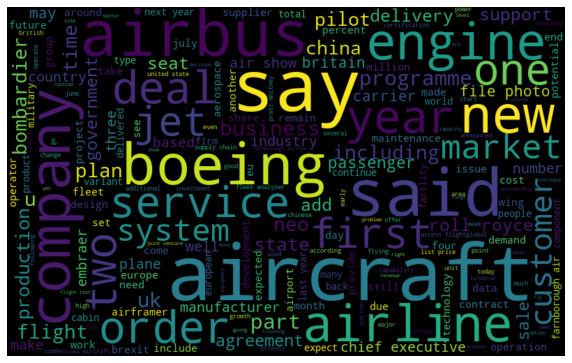

In [47]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_0)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [48]:
# From label 1
words_1 = ' '.join([ text for text in dataset['clean_text'][dataset['label'] == 1] ])

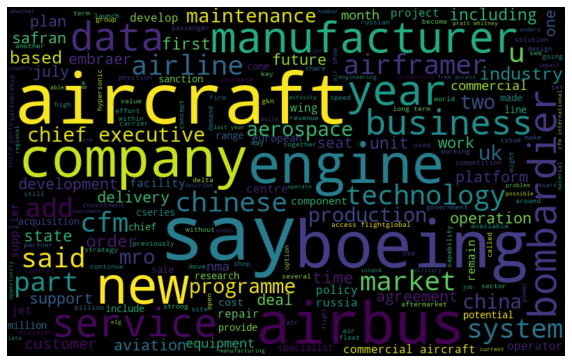

In [49]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Most of the most frequent words from each label are same like 'airbus', 'aircraft', 'boeing', 'engine', 'company', etc.
So, I don't think the annotation in this data is consistent enough to build a model.